In [2]:
# Goal: reproduce figures from the CVPR workshop paper using data stored in dataframes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats
import pickle
import os
from pathlib import Path

In [11]:

home_dir = "/Users/emily/code/collaborative-intelligence/tmp_files/"  # directory where the simulation data is saved

# 1. read the .csv file storing the results 
df = pd.read_csv(os.path.join(home_dir, 'resultsDF.csv'))

# load the extra parameters from the dictionary 
dict_params = pickle.load(open(os.path.join(home_dir,'additional_meta_params.sav'), 'rb'))
N_timesteps = dict_params['N_frames']
N_agents = dict_params['N_agents']


In [12]:
# 2. filter the rows of the table based on the case we are interested in. 
# Note that this part assumes that both distributed and clustered food cases 

# df_ignorers = df[ (df['c_trust'] == 0.5) ] 
# display(df_ignorers)
# df_distr = df[ (df['reward_patch_dim'] == 1)] 
# display(df_distr)

df_ignorers_distr = df[ (df['c_trust'] == 0) & (df['reward_patch_dim'] == 1) ]  # ignorers in distributed environments
df_ignorers_clust = df[ (df['c_trust'] == 0) & (df['reward_patch_dim'] == 4) ] # ignorers in clustered environments
df_comm_distr = df[ (df['c_trust'] == 0.5) & (df['reward_patch_dim'] == 1) ] # communicators in distributed
df_comm_clust = df[ (df['c_trust'] == 0.5) & (df['reward_patch_dim'] == 4) ] # communicators in clustered 

display(df_ignorers_clust)
display(df_comm_clust)

,Unnamed: 0,c_trust,sight_radius,reward_patch_dim,sim index,run index,time to first food,num birds failed
2,2,0.0,5.0,4.0,1.0,0,39.111111,7.0
3,3,0.0,5.0,4.0,1.0,1,25.888889,4.0


,Unnamed: 0,c_trust,sight_radius,reward_patch_dim,sim index,run index,time to first food,num birds failed
6,6,0.5,5.0,4.0,3.0,0,37.111111,6.0
7,7,0.5,5.0,4.0,3.0,1,36.444444,6.0


In [13]:
# 3. For each experimental condition (simulation), pull out the values in the columns corresponding to success measures

# Distributed food statistics
timetofood_ignorers_distr = df_ignorers_distr['time to first food']
timetofood_comm_distr = df_comm_distr['time to first food']
numfailed_ignorers_distr = df_ignorers_distr['num birds failed']
numfailed_comm_distr = df_comm_distr['num birds failed']

# Clustered food statistics 
timetofood_ignorers_clust = df_ignorers_clust['time to first food']
timetofood_comm_clust = df_comm_clust['time to first food']
numfailed_ignorers_clust = df_ignorers_clust['num birds failed']
numfailed_comm_clust = df_comm_clust['num birds failed']

print(numfailed_comm_distr)

4    0.0
5    2.0
Name: num birds failed, dtype: float64


In [25]:
# DISTRIBUTED

#%% Mann-Whitney statistical tests to test for statistical significance of differences
# between two types of agents (Ignorers vs Communicators.)

# # Environmental condition 1: Distributed food statistics 
# #   Performance metric 1: Time to food 
# mwu_time = stats.mannwhitneyu(timetofood_ignorers_distr, timetofood_comm_distr, method='auto', alternative='two-sided')

# #   Performance metric 2: Number of birds that failed to reach food 
# mwu_numfailed = stats.mannwhitneyu(numfailed_ignorers_distr, numfailed_comm_distr, method='auto', alternative='two-sided')

In [24]:
# CLUSTERED

#%% Mann-Whitney statistical tests to test for statistical significance of differences
# between two types of agents (Ignorers vs Communicators.)

# # Environmental condition 1: Distributed food statistics 
# #   Performance metric 1: Time to food 
# mwu_time = stats.mannwhitneyu(timetofood_ignorers_clust, timetofood_comm_clust, method='auto', alternative='two-sided')

# #   Performance metric 2: Number of birds that failed to reach food 
# mwu_numfailed = stats.mannwhitneyu(numfailed_ignorers_clust, numfailed_comm_clust, method='auto', alternative='two-sided')



Showing results for distributed food


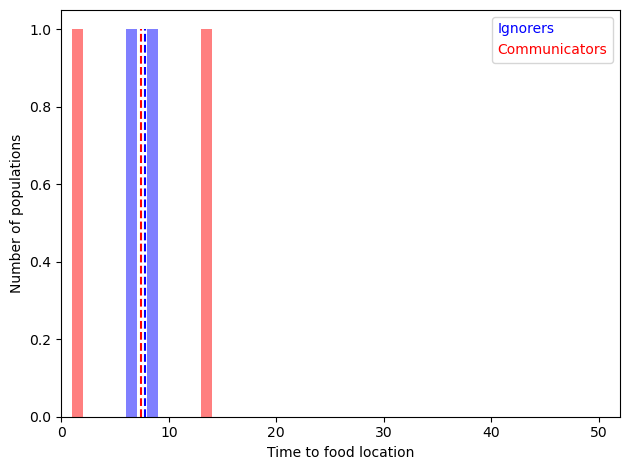

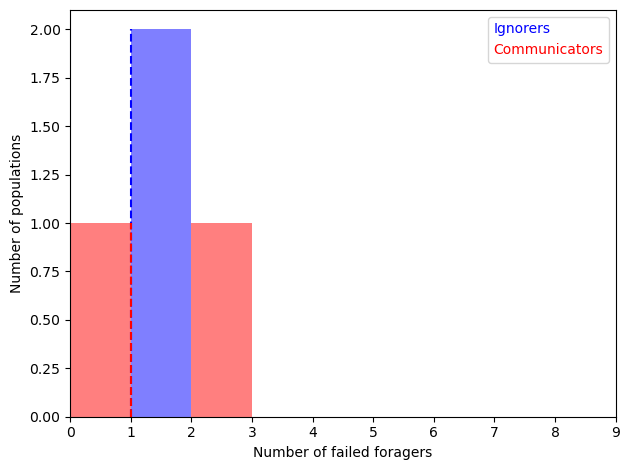

In [23]:
# TO DO: Make this section a function 

food_statistics = 'distributed'

if food_statistics == 'distributed':
    timetofood_ignorers = timetofood_ignorers_distr
    timetofood_communicators = timetofood_comm_distr
    numbirdsfailed_ignorers = numfailed_ignorers_distr
    numbirdsfailed_communicators = numfailed_comm_distr

elif food_statistics == 'clustered':
    timetofood_ignorers = timetofood_ignorers_clust
    timetofood_communicators = timetofood_comm_clust
    numbirdsfailed_ignorers = numfailed_ignorers_clust
    numbirdsfailed_communicators = numfailed_comm_clust

median_timetofood_ignorers = np.median(timetofood_ignorers)
median_timetofood_communicators = np.median(timetofood_communicators)
median_numbirdsfailed_ignorers = np.median(numbirdsfailed_ignorers)
median_numbirdsfailed_communicators = np.median(numbirdsfailed_communicators)


#%% Plots comparing Ignorers and Communicators for one of the food conditions

doLegend = True

print('Showing results for ' + food_statistics +  ' food')

# 1) Time to food
color_ignorers = 'blue'
color_communicators = 'red'
fig, ax = plt.subplots()
hist1data = ax.hist(timetofood_ignorers, bins=np.arange(N_timesteps + 2), color=color_ignorers, alpha=0.5, label='Ignorers')
hist2data = ax.hist(timetofood_communicators,  bins=np.arange(N_timesteps + 2),  color=color_communicators, alpha=0.5, label='Communicators')

ymin1, ymin2 = 0, 0
ymax1, ymax2 = np.max(hist1data[0]), np.max(hist2data[0]) 
ax.vlines(median_timetofood_ignorers, ymin1, ymax1, color=color_ignorers, linestyles='dashed')
ax.vlines(median_timetofood_communicators, ymin2, ymax2,  color=color_communicators, linestyles='dashed')
ax.set_xlabel('Time to food location')
ax.set_ylabel('Number of populations')
ax.set_xlim([0, N_timesteps+2 ])
ax.set_xticks(np.linspace(0, N_timesteps, 6).astype(int))
if doLegend:
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1), 
          labelcolor=[color_ignorers, color_communicators], handlelength=0, handletextpad=0,)
# also try labelcolor='linecolor'
fig.tight_layout()

# 2) Number of birds that failed
fig, ax = plt.subplots()
hist1data = ax.hist(numbirdsfailed_ignorers, bins=np.arange(N_agents), color=color_ignorers, alpha=0.5, label='Ignorers')
hist2data = ax.hist(numbirdsfailed_communicators, bins=np.arange(N_agents),  color=color_communicators, alpha=0.5, label='Communicators')

ymin1, ymin2 = 0, 0
ymax1, ymax2 = np.max(hist1data[0]), np.max(hist2data[0]) 
ax.vlines(median_numbirdsfailed_ignorers, ymin1, ymax1, color=color_ignorers, linestyles='dashed')
ax.vlines(median_numbirdsfailed_communicators, ymin2, ymax2,  color=color_communicators, linestyles='dashed')
ax.set_xlabel('Number of failed foragers')
ax.set_ylabel('Number of populations')
ax.set_xlim([0, N_agents])
ax.set_xticks(np.linspace(0, N_agents, N_agents+1).astype(int))
if doLegend:
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1), 
              labelcolor=[color_ignorers, color_communicators], handlelength=0, handletextpad=0,)
fig.tight_layout()


In [22]:
hist1data

(array([0., 2., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 8 artists>)